# Introducción a las RRNN con Keras
#### UD4. Redes Neuronales
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

Toma como base el siguiente [tutorial oficial de Keras](https://keras.io/examples/vision/mnist_convnet/) de François Chollet y crea una red neuronal simple en lugar de una convolucional.

In [518]:
import numpy as np
from tensorflow import  keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
from matplotlib import image
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist


# 1. Importación dataset MNIST

1.1. Carga el dataset de ejemplo MNIST separando el conjunto de entrenamiento del de pruebas.

In [519]:
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 2. EDA & Visual EDA

2.1. Comprueba la forma y dimensiones de las imágenes importadas.

In [520]:
x_train.shape
#Tenemos 60.000 muestras de imagenes de numeros
#Las dimensiones de la imagen es de 28x28
# 1 sería el numero de canales de color de las imagenes, como son de escala de grises solo tiene 1

(60000, 28, 28)

2.2. Calcula el ancho, alto y total de pixeles de cada imagen.

In [521]:
img_size_flat = 28*28
print(img_size_flat,'px')

784 px


2.3. Muestra algunas de las imágenes cargadas y comprueba que se ven correctamente.
Para mostrar varias, puedes usar:
* plt.subplot(x, y, i) y
* plt.imshow()

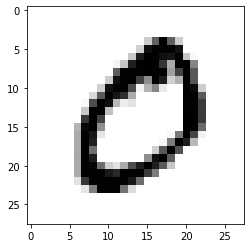

In [522]:
fig = plt.figure()
plt.imshow(x_train[1],cmap='gray_r')
plt.show()

# 3. Preparación del dataset para la Red Neuronal

3.1. Convierte los datos a coma flotante ‘float32’.

In [523]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")


3.2. Transforma las imágenes para que todos sus píxeles se encuentren en `[0, 1]`

In [524]:
X_train = x_train/255.0
X_test = x_test/255.0

3.3. Redimensiona/reacondiciona las dimensiones de las imágenes para que tengan las dimensiones que la red neuronal puede procesar.

In [525]:
X_train = np.reshape( x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2]) )
X_test = np.reshape( x_test, (x_test.shape[0],x_test.shape[1]*x_test.shape[2]) )
#Con esta función lo que haremos será reajustar el tamaño del set de entrenamiento a 60.000 x 784, ahora será un vector de 28 x 28

3.4. Calcula el número de clases de que dispone el conjunto de datos.

In [526]:
#La imagen está codificada como una matriz Numpy y la etiqueta es una matriz de números, con un rango de valores de 0 a 9


3.5. Convierte a categóricas las etiquetas del conjunto de entrenamiento (y_train) y del conjunto de test (y_test).

In [527]:
from keras.utils import np_utils

nclasses = 10
Y_train = np_utils.to_categorical(y_train,nclasses)
Y_test = np_utils.to_categorical(y_test,nclasses)

# 4. Creación de la Red Neuronal

In [528]:
np.random.seed(1)

In [529]:
input_dim = X_train.shape[1]
output_dim = Y_train.shape[1]
#Adicionalmente debemos definir el tamaño del dato de entrada (784 elementos) y del de salida (1 elemento):

4.2. Inserta una primera capa con las siguientes características:
* Que contenga 1000 neuronas
* Que acepte una entrada igual al número de píxeles de las imágenes que va a procesar
* Que use `Relu` como función de activación

In [530]:
from keras.models import Sequential

modelo = Sequential()

In [531]:
from keras.layers import Dense

modelo.add( Dense(1000, input_dim=input_dim, activation='relu'))


4.3. Construye la capa de salida. Usa `softmax` como función de activación

In [532]:
modelo.add( Dense(output_dim, activation='softmax'))

# 5. Entrenamiento
5.1. Compila el modelo creado:
* Usa categorical crossentropy como función de pérdida
* Usa `adam` como optimizador
* Usa la precisión como métrica

In [533]:
modelo.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

5.2. Comprueba la configuración de la RN antes creada

In [534]:
modelo.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 1000)              785000    
                                                                 
 dense_53 (Dense)            (None, 10)                10010     
                                                                 
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________


5.3. Entrena el modelo anterior usando la información del conjunto de datos de entrenamiento y el de test para validar la evolución y calidad del aprendizaje. Usa 5 épocas y un tamaño de batch de 1024 en cada pasada. Indica verbose 1, para que muestre la información del proceso.

In [535]:
entrenamiento = modelo.fit(X_train, Y_train, epochs=5, batch_size=1024, verbose=1)

Epoch 1/5
59/59 [==============================] - 1s 12ms/step - loss: 22.2350 - accuracy: 0.8331
Epoch 2/5
59/59 [==============================] - 1s 11ms/step - loss: 1.8876 - accuracy: 0.9425
Epoch 3/5
59/59 [==============================] - 1s 12ms/step - loss: 0.8457 - accuracy: 0.9597
Epoch 4/5
59/59 [==============================] - 1s 11ms/step - loss: 0.4819 - accuracy: 0.9694
Epoch 5/5
59/59 [==============================] - 1s 11ms/step - loss: 0.2645 - accuracy: 0.9787


# 6. Visualización

6.1. Muestra gráficamente la evolución de la precisión del modelo.

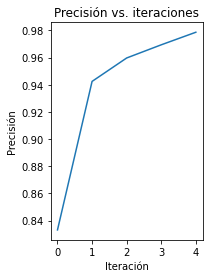

In [538]:
plt.subplot(1,2,2)
plt.plot(entrenamiento.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.show()

6.2. Muestra gráficamente la evolución de la función de pérdida.

Text(0.5, 0, 'Iteración')

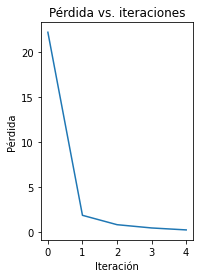

In [539]:
plt.subplot(1,2,1)
plt.plot(entrenamiento.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

# 7. Re-entrenamiento con nuevos parámetros


7.1. Entrena el modelo usando ahora los parámetros siguientes
* validation_split = 0.1, epochs=15, batch_size=4
* validation_split = 0.1, epochs=50, batch_size=1024

In [540]:
entrenamiento2 = modelo.fit(X_train, Y_train, epochs=15, batch_size=4, validation_split=0.1,verbose=1)


Epoch 1/15
13500/13500 [==============================] - 29s 2ms/step - loss: 2.3912 - accuracy: 0.8695 - val_loss: 0.5670 - val_accuracy: 0.9087
Epoch 2/15
13500/13500 [==============================] - 28s 2ms/step - loss: 0.7608 - accuracy: 0.8897 - val_loss: 0.7124 - val_accuracy: 0.9067
Epoch 3/15
13500/13500 [==============================] - 28s 2ms/step - loss: 0.6442 - accuracy: 0.9000 - val_loss: 0.9084 - val_accuracy: 0.9185
Epoch 4/15
13500/13500 [==============================] - 28s 2ms/step - loss: 0.6302 - accuracy: 0.9075 - val_loss: 0.6643 - val_accuracy: 0.9095
Epoch 5/15
13500/13500 [==============================] - 29s 2ms/step - loss: 0.6006 - accuracy: 0.9138 - val_loss: 0.6107 - val_accuracy: 0.9275
Epoch 6/15
13500/13500 [==============================] - 29s 2ms/step - loss: 0.5965 - accuracy: 0.9162 - val_loss: 0.7444 - val_accuracy: 0.9305
Epoch 7/15
13500/13500 [==============================] - 29s 2ms/step - loss: 0.5806 - accuracy: 0.9183 - val_loss: 0

In [541]:
entrenamiento3 = modelo.fit(X_train, Y_train, epochs=50, batch_size=1024, validation_split=0.1,verbose=1)

Epoch 1/50
53/53 [==============================] - 1s 14ms/step - loss: 0.3571 - accuracy: 0.9361 - val_loss: 0.6007 - val_accuracy: 0.9353
Epoch 2/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2674 - accuracy: 0.9383 - val_loss: 0.5995 - val_accuracy: 0.9362
Epoch 3/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2446 - accuracy: 0.9411 - val_loss: 0.6029 - val_accuracy: 0.9380
Epoch 4/50
53/53 [==============================] - 1s 13ms/step - loss: 0.2266 - accuracy: 0.9432 - val_loss: 0.6535 - val_accuracy: 0.9390
Epoch 5/50
53/53 [==============================] - 1s 13ms/step - loss: 0.2165 - accuracy: 0.9448 - val_loss: 0.6082 - val_accuracy: 0.9400
Epoch 6/50
53/53 [==============================] - 1s 13ms/step - loss: 0.2072 - accuracy: 0.9463 - val_loss: 0.6181 - val_accuracy: 0.9412
Epoch 7/50
53/53 [==============================] - 1s 12ms/step - loss: 0.2013 - accuracy: 0.9474 - val_loss: 0.6329 - val_accuracy: 0.9423
Epoch 8/50
53

7.2. Muestra gráficamente la evolución de la precisión y función de pérdida del modelo recien entrenado. Extrae conclusiones.

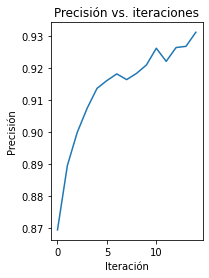

In [543]:
#Modelo con validation_split = 0.1, epochs=15, batch_size=4
plt.subplot(1,2,2)
plt.plot(entrenamiento2.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.show()

Podemos observar que a la hora de pasar de 5 iteraciones , no se produce una mejora destacable en la precisión del modelo entrenado

Text(0.5, 0, 'Iteración')

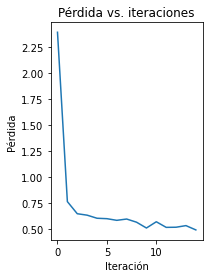

In [544]:
#Grafica para el Modelo con validation_split = 0.1, epochs=15, batch_size=4
plt.subplot(1,2,1)
plt.plot(entrenamiento2.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')

A la hora de la pérdida se parece bastante a la precisión, a partir de 2 iteraciones, la perdida no disminuye mucho más, eso si, podemos ver que a mayor numero de iteraciones disminuye la perdida .

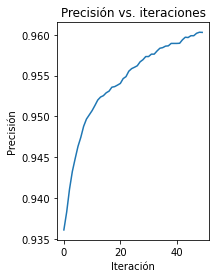

In [545]:
#Grafica para el Modelo con validation_split = 0.1, epochs=50, batch_size=1024
plt.subplot(1,2,2)
plt.plot(entrenamiento3.history['accuracy'])
plt.title('Precisión vs. iteraciones')
plt.ylabel('Precisión')
plt.xlabel('Iteración')
plt.show()

Observamos que la precision de este modelo es más alta de base, y aumenta cuando aumentamos el numero de interaciones, pero a costa de mayor timepo de cálculo

Text(0.5, 0, 'Iteración')

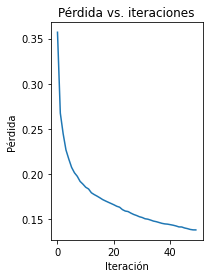

In [546]:
#Grafica para el Modelo con validation_split = 0.1, epochs=50, batch_size=1024
plt.subplot(1,2,1)
plt.plot(entrenamiento3.history['loss'])
plt.title('Pérdida vs. iteraciones')
plt.ylabel('Pérdida')
plt.xlabel('Iteración')